<a href="https://colab.research.google.com/github/PrajwalKoirala/Face-Detection-Pipeline/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random as rnd
import string
from operator import add
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import cv2
from google.colab.patches import cv2_imshow

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
class faceclassmodel():
    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.model = keras.models.load_model("/content/drive/My Drive/facenet_model/facenet_keras.h5")
        # self.optimizer = keras.optimizers.Adam(learning_rate=0.00025, clipnorm=1.0)
        print("Model Loaded. Compiling Manually ...")
        self.model.compile()
        # print(self.model.summary())

    def gimme_embeddings(self, imagedata):
        if type(imagedata) == str:
          imagedata = cv2.imread(imagedata)
        img = cv2.resize(imagedata, (160,160), interpolation=cv2.INTER_AREA)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        m = img.mean()
        s = img.std()
        x = np.expand_dims((img-m)/s, axis=0)
        images = np.vstack([x])
        emb = self.model.predict(images)
        return  emb

    def face_embeddings(self, imagedata, showfaces = True):
        if type(imagedata) == str:
          imagedata = cv2.imread(imagedata)
        img = cv2.resize(imagedata, (512,512), interpolation=cv2.INTER_AREA)
        imgcopy = np.copy(img)  
        faces = self.detect_face(img)
        embs = []     
        for (x,y,w,h) in faces:
          embs.append(self.gimme_embeddings(imgcopy[y:y+h, x:x+w]))
          cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        if showfaces: 
          plt.figure()
          plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        return img, faces, embs

    def detect_face(self, imagedata):
        if type(imagedata) == str:
          imagedata = cv2.imread(imagedata)
        img = cv2.resize(imagedata, (512,512), interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, 1.3, 5, 0 )
        return faces      

    def plot_faces(self, imagedata):
        if type(imagedata) == str:
          imagedata = cv2.imread(imagedata)
        img = cv2.resize(imagedata, (512,512), interpolation=cv2.INTER_AREA)  
        faces = self.detect_face(img)     
        for (x,y,w,h) in faces:
          cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        plt.figure()
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # cv2_imshow(img)
           

    def train_model(self, train_data, validation_data, epochs):
        history = self.model.fit(
                  train_data,
                  epochs=epochs,
                  verbose=1,
                  validation_data=validation_data )
        return history





facemodel = faceclassmodel()

Model Loaded. Compiling Manually ...


Tom Cruise 1 vs Tom Cruise 2 similarity:  8.68329
Tom Cruise 1 vs Tom Hanks 1 similarity:  16.543308
Tom Hanks 1 vs Tom Cruise 2 similarity:  16.539635


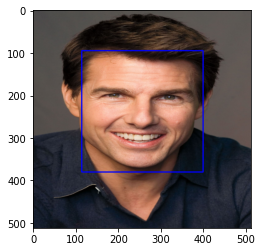

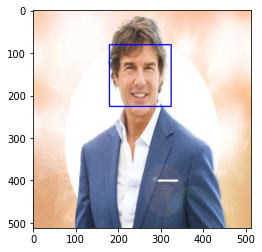

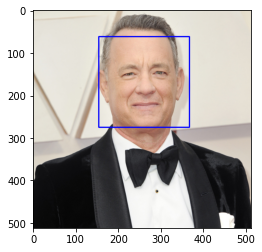

In [41]:
_, _, emb1 = facemodel.face_embeddings("/content/sample_data/tomcruise1.jpg")  
_, _, emb2 = facemodel.face_embeddings("/content/sample_data/tomcruise2.jpg")  
_, _, emb3 = facemodel.face_embeddings("/content/sample_data/tomhanks1.jpg")  
print('Tom Cruise 1 vs Tom Cruise 2 similarity: ',np.linalg.norm(emb1[0]-emb2[0]))
print('Tom Cruise 1 vs Tom Hanks 1 similarity: ',np.linalg.norm(emb1[0]-emb3[0]))
print('Tom Hanks 1 vs Tom Cruise 2 similarity: ',np.linalg.norm(emb2[0]-emb3[0]))

In [ ]:
# _, _, emb1 = facemodel.face_embeddings("/content/drive/My Drive/Defense/20220307_162553.jpg")   #547, 553 pra
# _, _, emb2 = facemodel.face_embeddings("/content/drive/My Drive/Defense/20220307_162547.jpg")   #612 kri
# print(np.linalg.norm(emb1[0]-emb2[0]))

In [ ]:
# optimizer=keras.optimizers.Adam(learning_rate=0.001), loss= //Triplet//, metrics=['acc']